<a href="https://colab.research.google.com/github/denzerphil/REPOSITORIUMONE/blob/main/%D0%9B%D0%B0%D0%B13_%D1%84%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Часть 1**




**Тема:** Простая и множественная линейная регрессия с Python.

**Цель:** Изучить средства языка программирования Python для работы с простой линейной регрессией.



Ход работы:



In [43]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from scipy import stats

Набор данных о росте и весе людей

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Следующим шагом я получил информацию о структуре датасета с помощью команд: df.shape, df.dtypes, df.info.

In [4]:
print("Количество строк, количество столбцов:", df.shape)

Количество строк, количество столбцов: (10000, 3)


In [5]:
print("Типы данных:\n", df.dtypes)

Типы данных:
 Gender     object
Height    float64
Weight    float64
dtype: object


In [6]:
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Проверка уникальности датасета

In [7]:
print("Количество неуникальных строк в датасете:", df.duplicated().sum())

Количество неуникальных строк в датасете: 0


In [8]:
print("Количество пустых значений в каждом столбце:")
df.isnull().sum()

Количество пустых значений в каждом столбце:


,0
Gender,0
Height,0
Weight,0


Замена пустых значений нулями

In [9]:
df_filled_z = df.fillna(0)

In [16]:
print("Датасет с заменой пустых значений")
df_filled_z.head()

Датасет с заменой пустых значений


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Следующим шагом я построил диаграммы для роста и веса.

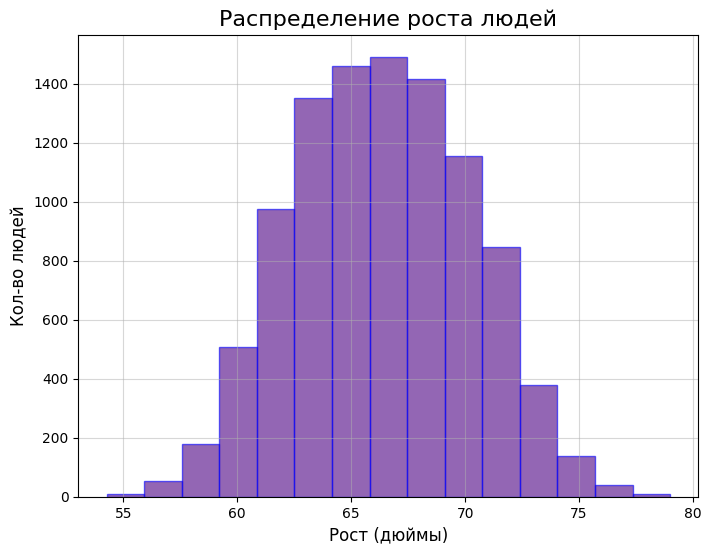

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['Height'], bins=15, color='indigo', edgecolor='blue', alpha=0.6)
plt.title('Распределение роста людей', fontsize=16)
plt.xlabel('Рост (дюймы)', fontsize=12)
plt.ylabel('Кол-во людей', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

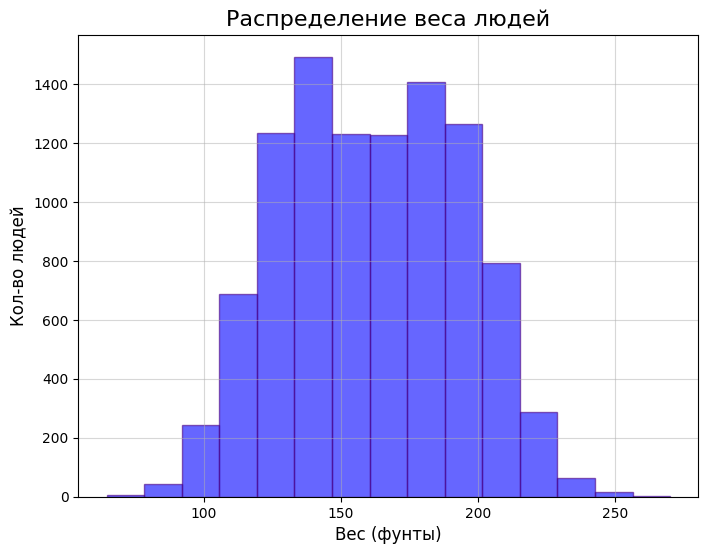

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['Weight'], bins=15, color='blue', edgecolor='indigo', alpha=0.6)
plt.title('Распределение веса людей', fontsize=16)
plt.xlabel('Вес (фунты)', fontsize=12)
plt.ylabel('Кол-во людей', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

Далее по полученным диаграммам необходимо определить закономерности зависимости между переменными роста и веса. А также реализовать функцию предсказания веса человека по его росту.

Для определения закономерности в первую очередь я решил построить диаграмму рассеяния разделив значения по полу. Это один из важных инструментов для определения зависимости между двумя переменными. В нашем случае между ростом и весом.

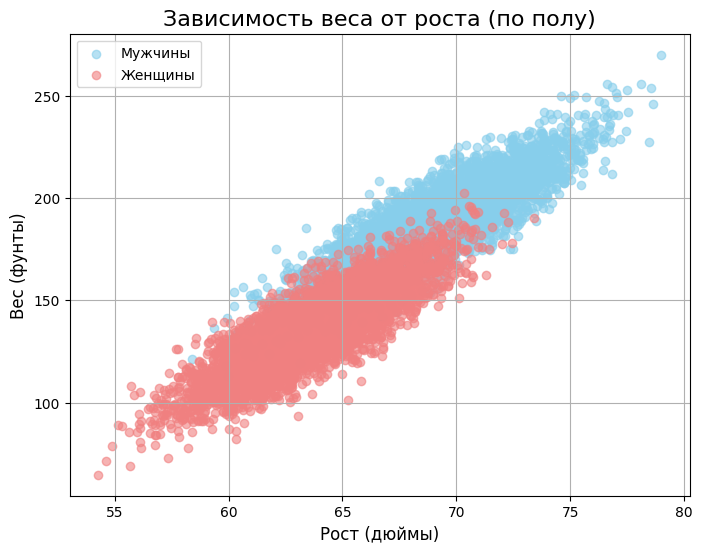

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Gender'] == 'Male']['Height'], df[df['Gender'] == 'Male']['Weight'],
            color='skyblue', alpha=0.6, label='Мужчины')
plt.scatter(df[df['Gender'] == 'Female']['Height'], df[df['Gender'] == 'Female']['Weight'],
            color='lightcoral', alpha=0.6, label='Женщины')
plt.title('Зависимость веса от роста (по полу)', fontsize=16)
plt.xlabel('Рост (дюймы)', fontsize=12)
plt.ylabel('Вес (фунты)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

На диаграмме рассеяния мы видим положительную линейную связь между ростом и весом. Рост является значимым фактором, влияющим на вес, но также присутствует существенная вариативность, что указывает на вклад других влияющих факторов.

Поскольку мне наужно предсказать вес на основе роста, мне необходимо создать модель.

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['Height']], df['Weight'])

LinearRegression()

Модель обучена, теперь создаю функцию предсказания.

In [21]:
def predict_weight(Height):
    height_df = pd.DataFrame([[Height]], columns=['Height'])
    return model.predict(height_df)[0]

Теперь попробую предсказать вес относительно роста в 70 дюймов:



In [22]:
height = 70
predicted_weight = predict_weight(height)
print(f"Предсказанный вес для роста {height} дюймов: {predicted_weight:.2f} фунтов.")

Предсказанный вес для роста 70 дюймов: 189.47 фунтов.


Коэффициент корреляции Пирсона между ростом и весом:

In [23]:
correlation = df['Height'].corr(df['Weight'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")

Коэффициент корреляции Пирсона: 0.92


Если значение близко к:

+1 -> Сильная положительная линейная зависимость
-1 -> Сильная отрицательная линейная зависимость
0 -> Слабая линейная зависимость или её отсутствие
В нашем случае коэф. корреляции равен 0.92, то есть значение близко к +1, соответственно, имеется сильная положительная линейная зависимость, что указывает на существенное влияние роста на вес.

Однако, важно учитывать и другие факторы.



Остаточные графики:

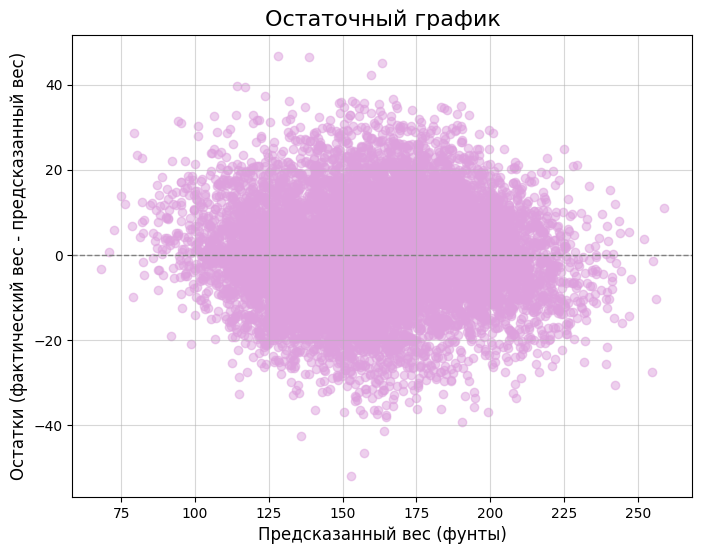

In [24]:
weight_predicted = model.predict(df[['Height']])
residuals = df['Weight'] - weight_predicted
plt.figure(figsize=(8, 6))
plt.scatter(weight_predicted, residuals, color='plum', alpha=0.5)
plt.title('Остаточный график', fontsize=16)
plt.xlabel('Предсказанный вес (фунты)', fontsize=12)
plt.ylabel('Остатки (фактический вес - предсказанный вес)', fontsize=12)
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.5)
plt.show()

На общем гарфике по всем данным мы видим, что разброс точек вокруг горизонтальной линии (ось остатков) не является постоянным. Визуально кажется, что разброс остатков увеличивается с ростом предсказанного веса. Это означает, что для более высоких предсказанных значений веса модель делает, как правило, значительные ошибки (как в сторону завышения, так и в сторону занижения).

Для большего понимания сделаю ещё два графика, один по данным 500 женщин, другой - по данным 500 мужчин. Для наглядности.

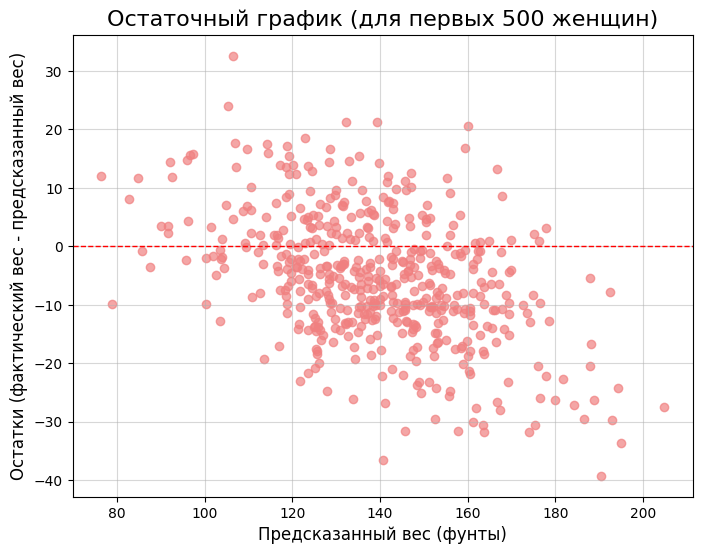

In [25]:
df_female = df[df['Gender'] == 'Female'].head(500)
weight_predicted = model.predict(df_female[['Height']])
residuals = df_female['Weight'] - weight_predicted

plt.figure(figsize=(8, 6))
plt.scatter(weight_predicted, residuals, color='lightcoral', alpha=0.7)
plt.title('Остаточный график (для первых 500 женщин)', fontsize=16)
plt.xlabel('Предсказанный вес (фунты)', fontsize=12)
plt.ylabel('Остатки (фактический вес - предсказанный вес)', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.5)
plt.show()

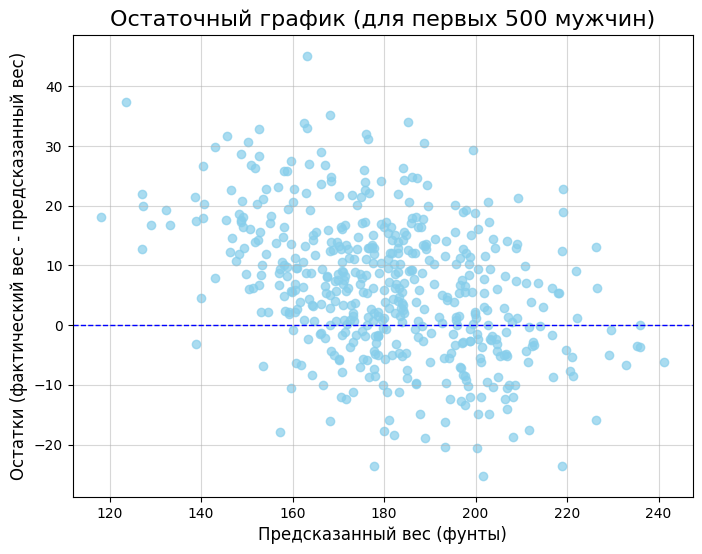

In [26]:
df_male = df[df['Gender'] == 'Male'].head(500)
weight_predicted = model.predict(df_male[['Height']])
residuals = df_male['Weight'] - weight_predicted

plt.figure(figsize=(8, 6))
plt.scatter(weight_predicted, residuals, color='skyblue', alpha=0.7)
plt.title('Остаточный график (для первых 500 мужчин)', fontsize=16)
plt.xlabel('Предсказанный вес (фунты)', fontsize=12)
plt.ylabel('Остатки (фактический вес - предсказанный вес)', fontsize=12)
plt.axhline(y=0, color='blue', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.5)
plt.show()

Из сравнения остаточных графиков можно сделать вывод о том, что линейная модель лучше описывает зависимость между ростом и весом для мужчин, чем для женщин. У мужчин остатки распределены более случайно.

Так или иначе, в обеих группах (мужчины и женщины), но особенно у женщин, точность предсказания веса с помощью линейной модели существенно различается в зависимости от предсказанного значения веса.

По итогу, анализ остаточных графиков показал, что линейная модель, хоть и дает в целом неплохие результаты, но имеет ограничения. И несмотря на сильную линейную связь, выявленную при помощи визуального анализа и подтверждённую высоким коэффициентом корреляции, остаточные графики демонстрирует, что предсказания веса с помощью линейной регрессии обладают определённым недостатком.

**Часть 2**

**Тема:** Множественная линейная регрессия.

**Цель:** Изучение средств языка программирования Python для работы с множественной линейной регрессией; освоение способов работы с категориальными переменными и методов анализа данных при помощи регрессионной модели машинного обучения.

Вариант 2 - файл "bikes_rent.csv"

**Ход работы:**

В соответствии с номером варианта я начала выполнение заданий.

**Цель исследования:** Прогнозирование количества арендованных велосипедов ("cnt") на основе различных факторов окружающей среды и времени.

**Задачи:**

Определить влияние погодных условий (температура, влажность, скорость ветра) на количество арендованных велосипедов.
Оценить, как время года, год, месяц, день недели и является ли день рабочим или праздничным, влияют на спрос на аренду велосипедов.
Построить модель линейной регрессии для прогнозирования количества арендованных велосипедов.
Оценка качества построенной модели регрессии.

Просмотрел и преобразовал данные:

In [27]:
df = pd.read_csv('bikes_rent.csv')

print("Первые 5 строк данных:")
df.head()

Первые 5 строк данных:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [28]:
print("Информация о данных:")
df.info()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [29]:
print("Описательная статистика:")
df.describe()

Описательная статистика:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [30]:
print("Пропущенные значения:")
df.isnull().sum()

Пропущенные значения:


,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


Так как все столбцы имеют числовой формат, ничего преобразовывать не надо.

Следующим шагом я представил визуализацию зависимости данных. Сначала создал графики влияния погодных условий на количество велосипедов.

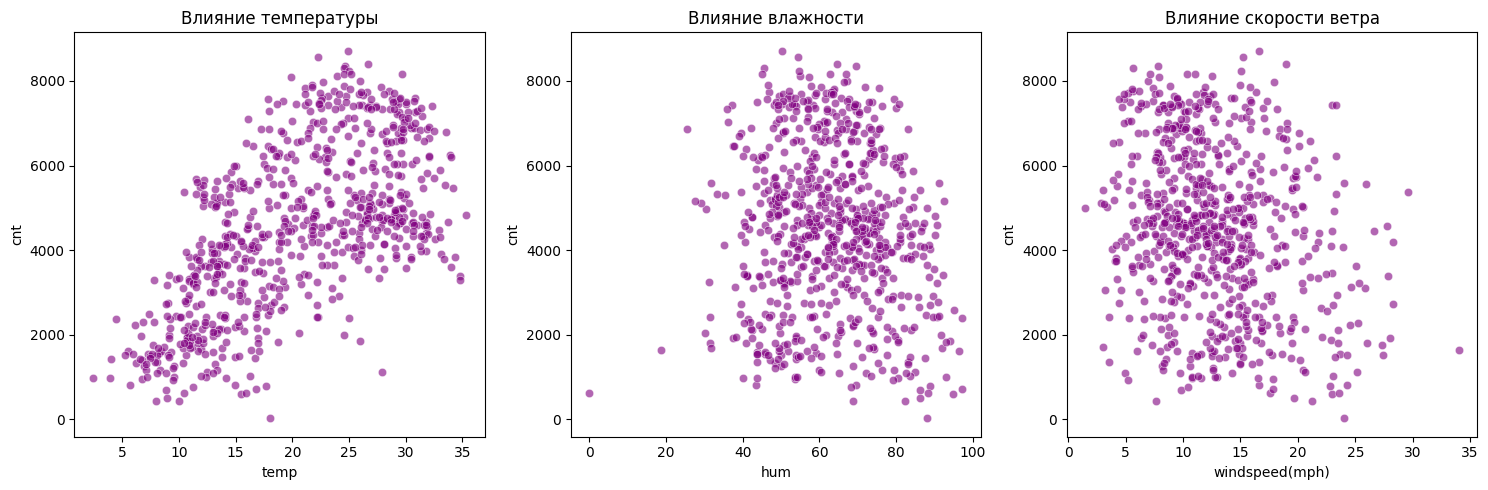

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=df, color='purple', alpha=0.6)
plt.title('Влияние температуры')

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=df, color='purple', alpha=0.6)
plt.title('Влияние влажности')

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed(mph)', y='cnt', data=df, color='purple', alpha=0.6)
plt.title('Влияние скорости ветра')

plt.tight_layout()
plt.show()

По этим графикам мы можем сделать вывод о том, что температура является наиболее важным погодным фактором, влияющим на количество используемых велосипедов. Влажность оказывает некоторое негативное влияние при высоких значениях, но гораздо менее выраженное. Скорость ветра, по-видимому, не оказывает существенного влияния.

Далее создадим графики влияния временных факторов на количество велосипедов.

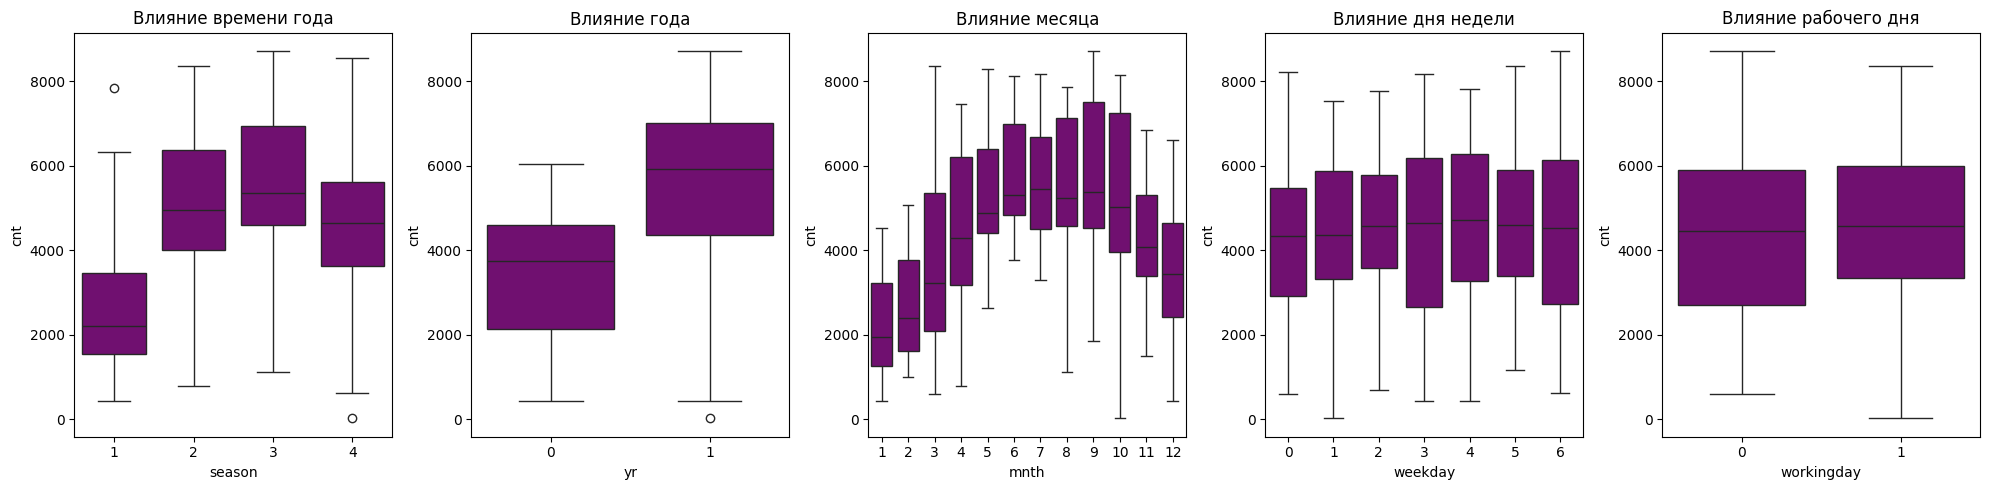

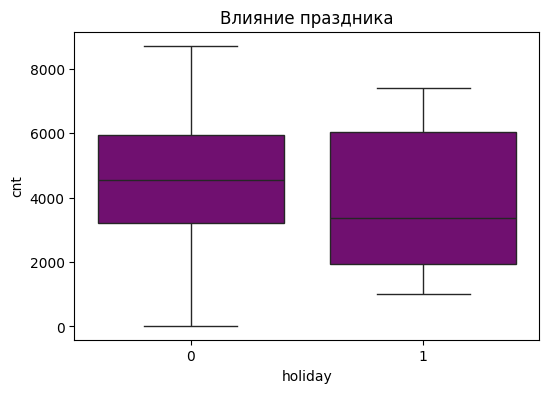

In [32]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
sns.boxplot(x='season', y='cnt', data=df, color='purple')
plt.title('Влияние времени года')

plt.subplot(1, 5, 2)
sns.boxplot(x='yr', y='cnt', data=df, color='purple')
plt.title('Влияние года')

plt.subplot(1, 5, 3)
sns.boxplot(x='mnth', y='cnt', data=df, color='purple')
plt.title('Влияние месяца')

plt.subplot(1, 5, 4)
sns.boxplot(x='weekday', y='cnt', data=df, color='purple')
plt.title('Влияние дня недели')

plt.subplot(1, 5, 5)
sns.boxplot(x='workingday', y='cnt', data=df, color='purple')
plt.title('Влияние рабочего дня')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='cnt', data=df, color='purple')
plt.title('Влияние праздника')
plt.show()

Наиболее важным временным фактором является сезонность, которая проявляется как во времени года, так и в месяце. Как мы можем заметить, летом и весной количество велосипедов значительно выше.

Также можем сделать ввывод, что с каждым годом использование велосипедов становится все более популярным.

Судя по всему, нет большой разницы в количестве используемых велосипедов между будними и выходными днями, что говорит об использовании велосипедов как для рабочих, так и для досуговых целей.

День недели, по-видимому, не оказывает существенного влияния.

Также как и праздники не сильно влияют на медианное количество аренд, но могут влиять на разброс данных, делая спрос более непредсказуемым.

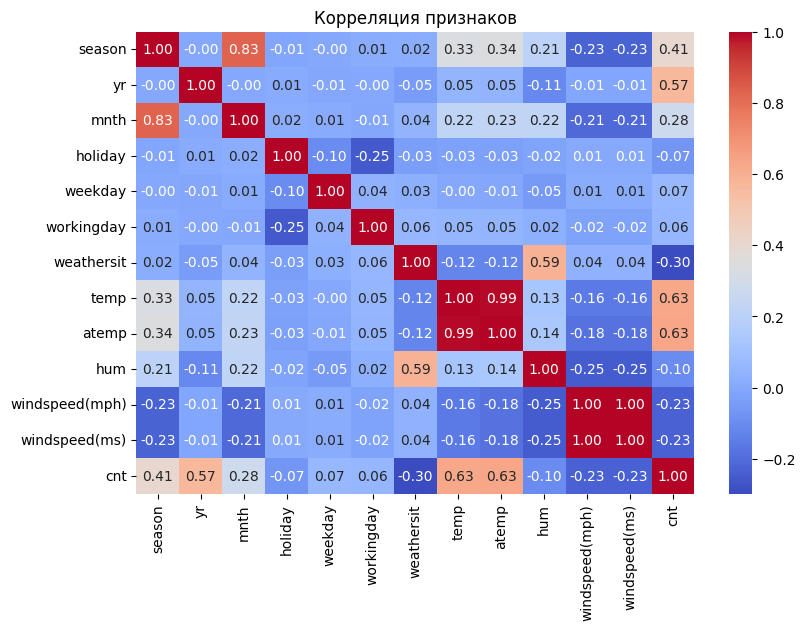

In [33]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

Сильные положительные корреляции с "cnt":

temp (температура) и atemp (ощущаемая температура): Обе переменные имеют высокую корреляцию с cnt (0.63), что указывает на то, что в более теплую погоду люди чаще пользуются велосипедами.
yr (год): Имеет положительную корреляцию с cnt (0.57), что предполагает увеличение количества аренд велосипедов с течением времени, возможно, из-за популяризации сервиса.
season (сезон): Показывает корреляцию 0.41 с cnt, что говорит о том, что сезон оказывает влияние на количество аренд велосипедов (например, летом аренд больше).

Отрицательные корреляции с "cnt":

weathersit (погодные условия): Имеет отрицательную корреляцию с cnt (-0.30), что указывает на то, что в плохую погоду (например, дождь или снег) количество аренд велосипедов снижается.
hum (влажность): Имеет небольшую отрицательную корреляцию с cnt (-0.10), что означает, что высокая влажность может немного снижать спрос на велосипеды.
windspeed(mph) и windspeed(ms) (скорость ветра): Имеют небольшую отрицательную корреляцию с cnt (-0.23), что указывает на то, что сильный ветер может отпугивать потенциальных арендаторов велосипедов.

В общем, наиболее важными факторами, влияющими на переменную cnt, являются температура (temp и atemp), год (yr) и сезон (season). Погодные условия (weathersit), влажность (hum) и скорость ветра (windspeed) оказывают отрицательное влияние на количество аренд. А также, следует осторожно подходить к включению высококоррелированных предикторов (таких как temp и atemp, windspeed(mph) и windspeed(ms),season и mnth) в одну и ту же модель, чтобы избежать мультиколлинеарности.

Зависимая переменная: 'cnt'.

Следующим шагом я считаю VIF (Variance Inflation Factor). Это показатель, который измеряет степень мультиколлинеарности между переменными в модели регрессии. Мультиколлинеарность возникает, когда два или более признака в модели сильно коррелируют друг с другом. Высокие значения VIF указывают на сильную мультиколлинеарность.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)']
target = 'cnt'
def calculate_vif(data, features):
    vif = pd.DataFrame()
    vif["Variable"] = features
    vif["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(data[features].shape[1])]
    return vif

vif = calculate_vif(df, features)
print("\nVIF:")
print(vif)


VIF:
          Variable         VIF
0           season   21.247200
1               yr    1.954891
2             mnth   15.239929
3          holiday    1.099342
4          weekday    3.101564
5       workingday    3.276291
6       weathersit   13.171543
7             temp  493.399107
8            atemp  558.624052
9              hum   28.048426
10  windspeed(mph)    5.297042


Самые высокие показатели у temp (температура) и atemp (ощущаемая температура). Это говорит о том, что эти два признака очень сильно коррелируют друг с другом и, скорее всего, представляют практически одну и ту же информацию. А также season (время года) и mnth (месяц) имеют высокие значения VIF, что указывает на их взаимосвязь.

Поэтому далее я удалю показатель atemp и показатель mnth.

In [35]:
from sklearn.model_selection import train_test_split

features1 = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed(mph)']
X = df[features1]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({"Реальное знач.": y_test.values, "Предсказанное знач.": y_pred})
print(predictions_df.head())

   Реальное знач.  Предсказанное знач.
0            6606          6248.012183
1            1550          1620.549069
2            3747          3054.160546
3            6041          4251.518793
4            7538          6636.857812


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²): {r2:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f'MSE (Среднеквадратичная ошибка): {mse:.2f}')
rmse = np.sqrt(mse)
print(f'RMSE (Средняя ошибка предсказания): {rmse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE (Средняя абсолютная ошибка): {mae:.2f}')

Коэффициент детерминации (R²): 0.82
MSE (Среднеквадратичная ошибка): 702088.65
RMSE (Средняя ошибка предсказания): 837.91
MAE (Средняя абсолютная ошибка): 629.94


Модель демонстрирует хорошее качество предсказаний, что подтверждается высоким коэффициентом детерминации (R² = 0.82), указывающим на то, что 82% вариации зависимой переменной объясняется моделью. Значения среднеквадратичной ошибки (MSE = 702088.65) и средней абсолютной ошибки (MAE = 629.94) показывают, что предсказания имеют приемлемые отклонения от фактических значений, а средняя ошибка предсказания (RMSE = 837.91) указывает на среднее отклонение в той же единице измерения. В целом, модель обладает хорошей предсказательной способностью и может быть эффективной для решения поставленной задачи.

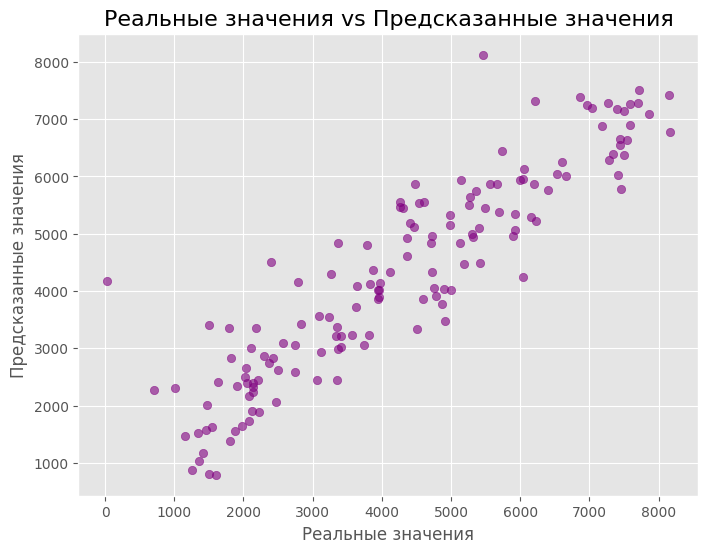

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.title("Реальные значения vs Предсказанные значения", fontsize=16)
plt.xlabel("Реальные значения", fontsize=12)
plt.ylabel("Предсказанные значения", fontsize=12)
plt.show()

На графике "Реальные значения vs Предсказанные значения" видно, что существует положительная корреляция между реальными и предсказанными значениями. Большинство точек расположены близко или по крайней мере стремятся, формируя некую диагональную линию, что указывает на адекватную производительность модели. Тем не менее, наблюдается разброс точек, особенно при высоких значениях, что указывает на наличие ошибок в предсказаниях модели.

Заключение:

Я изучила средства языка программирования Python для работы с простой линейной регрессией, а также с множественной линейной регрессией. Освоила способы работы с категориальными переменными и методы анализа данных при помощи регрессионной модели машинного обучения.